## 1. 데이터 로드

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [2]:
# 데이터 로드
train = pd.read_csv('C:/Users/subin/github/Little-Sonny/data/train.csv')
test = pd.read_csv('C:/Users/subin/github/Little-Sonny/data/test.csv')
submission = pd.read_csv('C:/Users/subin/github/Little-Sonny/data/sample_submission.csv')

print(f'Train 데이터 크기: {train.shape}')
print(f'Test 데이터 크기: {test.shape}')
print(f'Submission 데이터 크기: {submission.shape}')

Train 데이터 크기: (3019, 66)
Test 데이터 크기: (1626, 65)
Submission 데이터 크기: (1626, 2)


## 2. 데이터 확인

In [3]:
# 컬럼명만 리스트로 출력
print(list(train.columns))

['ID', 'Age', 'Height', 'Weight', 'Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating', 'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating', 'GKRating', 'Prospect']


#### 1. 기본 인적 사항 (Basic Profile)

* **ID**: 선수 고유 식별 번호
* **Age**: 나이 (유망주 판단의 결정적 요소)
* **Height / Weight**: 키(cm) 및 몸무게(kg)
* **Position**: 주 포지션
* **PreferredFoot**: 주발 (Left / Right)
* **Attacking / Defensive WorkRate**: 공격 및 수비 참여도 (High/Medium/Low)

#### 2. 6대 핵심 요약 스탯 (Main Totals)

* **PaceTotal / ShootingTotal / PassingTotal**: 속도, 슈팅, 패스 능력 합계
* **DribblingTotal / DefendingTotal / PhysicalityTotal**: 드리블, 수비, 피지컬 능력 합계

#### 3. 세부 기술 스탯 (Technical Skills)

* **공격 기술**: `Crossing`(크로스), `Finishing`(결정력), `HeadingAccuracy`(헤더), `Volleys`(발리슛), `Curve`(커브), `FKAccuracy`(프리킥), `LongShots`(중거리슛), `Penalties`(PK)
* **패스/컨트롤**: `ShortPassing`(짧은패스), `LongPassing`(긴패스), `BallControl`(볼컨트롤), `Vision`(시야)
* **수비 기술**: `Marking`(대인방어), `StandingTackle`(태클), `SlidingTackle`(슬라이딩 태클), `Interceptions`(가로채기)

#### 4. 신체 및 심리 스탯 (Physical & Mental)

* **운동 능력**: `Acceleration`(가속력), `SprintSpeed`(주력), `Agility`(민첩성), `Reactions`(반응속도), `Balance`(밸런스), `ShotPower`(슛파워), `Jumping`(점프력), `Stamina`(체력), `Strength`(힘)
* **심리/태도**: `Aggression`(적극성), `Positioning`(위치선정), `Composure`(침착함)

#### 5. 골키퍼 전용 스탯 (GK Special)

* **GK 스탯 5종**: `GKDiving`, `GKHandling`, `GKKicking`, `GKPositioning`, `GKReflexes`

#### 6. 포지션별 숙련도 레이팅 (Detailed Ratings)

* **공격**: `STRating`, `LW/RW/LF/RF/CF Rating`
* **미드필더**: `CAM/LM/CM/RM/CDM Rating`
* **수비**: `LWB/RWB/LB/RB/CB Rating`
* **골키퍼**: `GKRating`

#### 7. 타겟 변수 (The Goal)

* **Prospect**: **유망주 여부 (0: 일반, 1: 유망주)**

In [4]:
train.isnull().sum()

ID          0
Age         0
Height      0
Weight      0
Position    0
           ..
LBRating    0
CBRating    0
RBRating    0
GKRating    0
Prospect    0
Length: 66, dtype: int64

In [5]:
missing_values = test.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [6]:
# 수비수 그룹(DF) 필터링 (중앙/측면 수비수 포함)
df_positions = ['CB', 'LB', 'RB', 'LWB', 'RWB']
df_def = train[train['Position'].isin(df_positions)].copy()

print(f"수비수 데이터 수: {len(df_def)}개")

수비수 데이터 수: 908개


In [7]:
df_def.head()

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0
5,TRAIN_0005,18,177,73,LB,Left,Medium,Medium,5.0725,1.1842,...,2.7397,3.3784,4.3662,3.5714,4.3662,4.5714,4.3056,4.5714,0.625,0
8,TRAIN_0008,19,174,60,RB,Right,Medium,Medium,4.0580,1.5789,...,3.1507,3.7838,4.5070,3.4286,4.5070,4.5714,3.8889,4.5714,0.875,0


In [8]:
# 1. 수치형 데이터만 선택
df_numeric = df_def.select_dtypes(include=['number'])

# 2. 모든 컬럼과 'prospect' 간의 상관계수 계산
prospect_corr = df_numeric.corr()['Prospect'].sort_values(ascending=False)

# 3. 자기 자신(prospect)을 제외하고 상위 10개 출력
print("### little sonny 팀의 'prospect'와 가장 상관관계가 높은 지표 TOP 10 ###")
print(prospect_corr[1:11])

### little sonny 팀의 'prospect'와 가장 상관관계가 높은 지표 TOP 10 ###
GKDiving         0.095965
Height           0.071579
GKHandling       0.026189
Weight           0.015714
GKKicking       -0.022037
GKReflexes      -0.025601
Jumping         -0.033738
Penalties       -0.037498
GKPositioning   -0.066985
ShotPower       -0.069333
Name: Prospect, dtype: float64


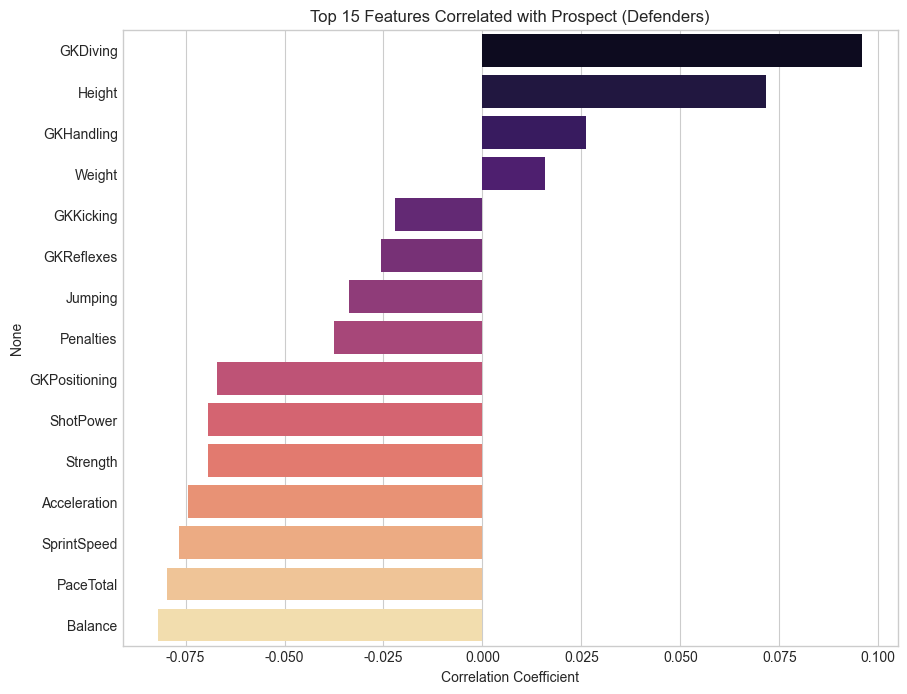

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 15개 지표 시각화
plt.figure(figsize=(10, 8))
top_15_corr = prospect_corr[1:16] # 자기 자신 제외 상위 15개

sns.barplot(x=top_15_corr.values, y=top_15_corr.index, palette='magma')
plt.title('Top 15 Features Correlated with Prospect (Defenders)')
plt.xlabel('Correlation Coefficient')
plt.show()

In [10]:
# 1. 'GK'가 포함된 컬럼 제외
# 분석에서 제외하고 싶은 키워드들을 리스트에 넣으세요
exclude_keywords = ['GK'] 

# 해당 키워드가 포함되지 않은 컬럼들만 필터링
cols_to_use = [col for col in df_numeric.columns if not any(key in col for key in exclude_keywords)]
df_filtered = df_numeric[cols_to_use]

# 2. 다시 'prospect'와의 상관계수 계산
prospect_corr_refined = df_filtered.corr()['Prospect'].sort_values(ascending=False)

# 3. 결과 확인 (상위 10개)
print("### [정제 후] 'prospect'와 상관관계가 높은 실제 능력치 TOP 10 ###")
print(prospect_corr_refined[1:11])

### [정제 후] 'prospect'와 상관관계가 높은 실제 능력치 TOP 10 ###
Height          0.071579
Weight          0.015714
Jumping        -0.033738
Penalties      -0.037498
ShotPower      -0.069333
Strength       -0.069434
Acceleration   -0.074377
SprintSpeed    -0.076537
PaceTotal      -0.079578
Balance        -0.082025
Name: Prospect, dtype: float64


In [11]:
print("'Prospect'와 반비례 관계인 지표")
print(prospect_corr_refined.tail(10))

'Prospect'와 반비례 관계인 지표
Marking         -0.209200
CDMRating       -0.217432
SlidingTackle   -0.218970
Reactions       -0.219921
LWBRating       -0.248754
RWBRating       -0.248754
RBRating        -0.251543
LBRating        -0.251543
Stamina         -0.269796
Age             -0.592633
Name: Prospect, dtype: float64


In [12]:
# 19세 이하 유망주들만 따로 뽑아서 분석
young_prospects = df_def[df_def['Age'] <= 19]

# GK 및 포지션 레이팅 제외 후 다시 상관계수 확인
exclude_cols = ['GK', 'Rating', 'Age']
cols_to_check = [c for c in young_prospects.select_dtypes('number').columns if not any(k in c for k in exclude_cols)]

refined_corr = young_prospects[cols_to_check].corr()['Prospect'].sort_values(ascending=False)

print("### 19세 이하 유망주 내에서 Prospect와 상관관계가 높은 지표 ###")
print(refined_corr[1:11])

### 19세 이하 유망주 내에서 Prospect와 상관관계가 높은 지표 ###
Height              0.096869
Weight              0.089725
Strength            0.040821
Jumping             0.020327
Penalties          -0.024315
Finishing          -0.028882
ShortPassing       -0.041933
PhysicalityTotal   -0.042426
SprintSpeed        -0.049167
HeadingAccuracy    -0.050668
Name: Prospect, dtype: float64


In [13]:
# 상관계수가 높게 나온 Height와 Strength를 기준으로 정렬
top_physique_prospects = df_def[df_def['Age'] <= 19].sort_values(
    by=['Prospect', 'Height', 'Strength'], 
    ascending=False
)

# 주요 지표들만 확인
print("### 19세 이하: 신체조건이 뛰어난 TOP 유망주 명단 ###")
print(top_physique_prospects[['ID', 'Age', 'Prospect', 'Height', 'Strength','Jumping', 'Position']].head(10))

### 19세 이하: 신체조건이 뛰어난 TOP 유망주 명단 ###
              ID  Age  Prospect  Height  Strength  Jumping Position
617   TRAIN_0617   19         1     204    9.2958   7.1233       CB
1041  TRAIN_1041   19         1     197    8.3099   2.6027       CB
1563  TRAIN_1563   19         1     197    7.8873   7.3973       CB
2841  TRAIN_2841   17         1     196    9.2958   3.5616       CB
2302  TRAIN_2302   19         1     195    8.0282   6.9863       CB
1306  TRAIN_1306   19         1     195    6.7606   3.8356       CB
1419  TRAIN_1419   18         1     195    6.6197   4.6575       CB
1138  TRAIN_1138   18         1     194    5.9155   6.7123       CB
498   TRAIN_0498   17         1     194    4.5070   5.2055       CB
1540  TRAIN_1540   18         1     193    6.1972   6.8493       CB


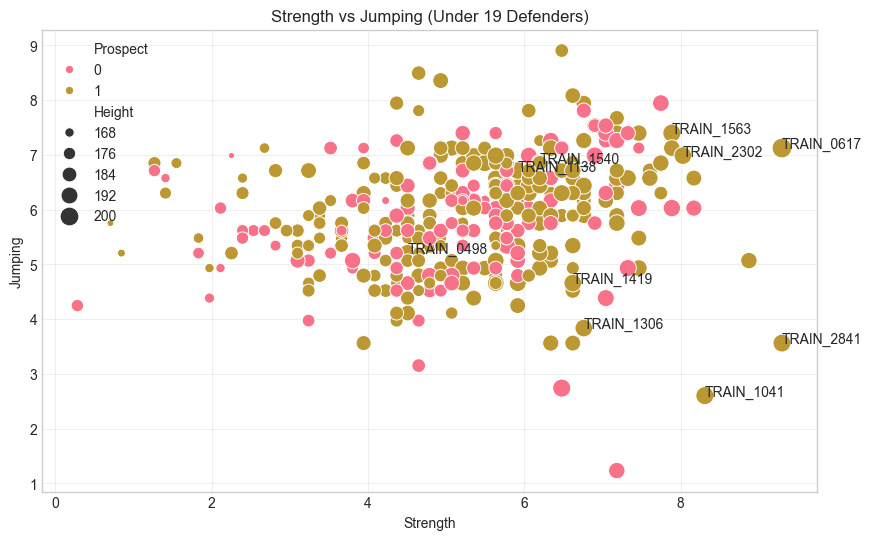

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 19세 이하 수비수들로 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_def[df_def['Age'] <= 19], 
                x='Strength', y='Jumping', hue='Prospect', size='Height', sizes=(20, 200))

# 우리가 찾은 선수들 강조 (예시로 상위 5개만)
for i in range(10):
    plt.text(top_physique_prospects.iloc[i]['Strength'], 
             top_physique_prospects.iloc[i]['Jumping'], 
             top_physique_prospects.iloc[i]['ID'])

plt.title('Strength vs Jumping (Under 19 Defenders)')
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# 1. 삭제할 컬럼 리스트 정의
cols_to_drop = [
    # 골키퍼 관련
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'GKRating',
    # 공격/슈팅 관련 (수비수에게 불필요)
    'Finishing', 'Volleys', 'FKAccuracy', 'Penalties', 'ShootingTotal',
    # 수비와 무관한 포지션 숙련도
    'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
    'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'CDMRating'
]

# 2. 컬럼 삭제 실행
df_def_slim = df_def.drop(columns=cols_to_drop)

print(f"삭제 전 컬럼 수: {df_def.shape[1]}개")
print(f"삭제 후 컬럼 수: {df_def_slim.shape[1]}개")
print("-" * 30)
print(df_def_slim.columns.tolist())

삭제 전 컬럼 수: 66개
삭제 후 컬럼 수: 44개
------------------------------
['ID', 'Age', 'Height', 'Weight', 'Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'LWBRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating', 'Prospect']


🧹 데이터 다이어트 (Feature Dropping)
수비수 분석의 집중도를 높이기 위해, 유망주 판별과 상관관계가 낮은 다음 컬럼들을 제거함:

GK 스탯: 수비수의 필드 플레이 능력과 무관함.

공격/슈팅 스탯: 결정력, 발리슛 등 수비수에게 요구되지 않는 공격 지표 제외.

타 포지션 레이팅: 공격수(ST)나 미드필더(CAM) 자리에서의 숙련도는 수비 유망주 판단에 노이즈가 될 수 있어 제거함.

결과: 데이터셋을 핵심 수비/피지컬 지표 중심으로 슬림화하여 분석의 효율성을 확보함.

In [16]:
df_def_slim

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,PassingTotal,...,Composure,Marking,StandingTackle,SlidingTackle,LWBRating,RWBRating,LBRating,CBRating,RBRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,3.2353,...,5.3012,6.7416,6.7816,6.6667,6.1972,6.1972,6.4286,6.5278,6.4286,0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.9706,...,3.7349,5.0562,5.9770,5.9524,5.7746,5.7746,5.8571,5.0000,5.8571,0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,0.4412,...,3.2530,5.2809,5.0575,5.2381,4.0845,4.0845,4.5714,4.5833,4.5714,0
5,TRAIN_0005,18,177,73,LB,Left,Medium,Medium,5.0725,0.8824,...,3.1325,4.1573,4.8276,5.5952,4.3662,4.3662,4.5714,4.3056,4.5714,0
8,TRAIN_0008,19,174,60,RB,Right,Medium,Medium,4.0580,1.3235,...,2.2892,4.1573,4.5977,5.2381,4.5070,4.5070,4.5714,3.8889,4.5714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,TRAIN_2997,20,180,75,CB,Right,Medium,Medium,5.0725,2.0588,...,3.4940,6.9663,7.2414,6.9048,5.7746,5.7746,6.2857,6.3889,6.2857,1
2999,TRAIN_2999,20,188,79,CB,Left,Medium,High,4.9275,3.2353,...,3.8554,7.5281,7.1264,6.4286,6.0563,6.0563,6.4286,6.8056,6.4286,0
3000,TRAIN_3000,18,185,75,CB,Right,Medium,Medium,4.9275,2.2059,...,4.3373,6.1798,6.5517,6.5476,5.2113,5.2113,5.7143,5.9722,5.7143,1
3001,TRAIN_3001,19,182,70,CB,Right,Medium,Medium,3.3333,0.2941,...,2.7711,5.2809,5.4023,5.2381,4.0845,4.0845,4.4286,4.8611,4.4286,1


In [17]:
# 1. 수비 핵심 기술 점수
df_def_slim['Defensive_Skill'] = df_def_slim[['Marking', 'StandingTackle', 'SlidingTackle', 'Interceptions']].mean(axis=1)

# 2. 엔진/기동력 점수 (윙백과 풀백의 핵심)
df_def_slim['Engine_Score'] = df_def_slim[['Acceleration', 'SprintSpeed', 'Stamina']].mean(axis=1)

# 3. 신체적 압도감 (센터백의 핵심)
df_def_slim['Physical_Power'] = df_def_slim[['Strength', 'Jumping', 'HeadingAccuracy']].mean(axis=1)

# 4. 종합 스카우팅 점수 (나이가 어릴수록 가산점)
# (종합 점수를 나이로 나누어 유망 가치를 극대화)
df_def_slim['Total_Prospect_Score'] = (
    (df_def_slim['Defensive_Skill'] * 0.1) + 
    (df_def_slim['Engine_Score'] * 0.2) + 
    (df_def_slim['Physical_Power'] * 0.7)
) / df_def_slim['Age']

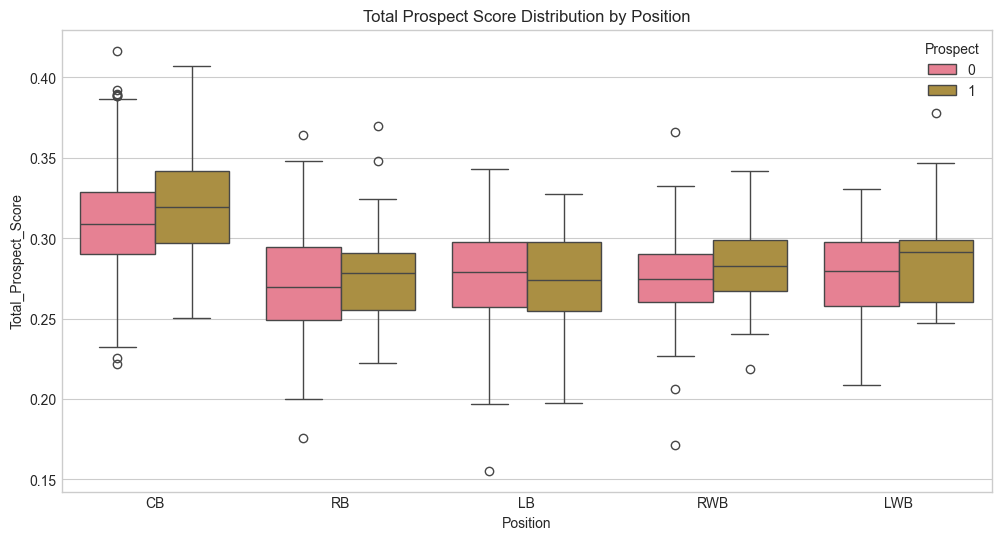

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 포지션별 종합 점수 분포 확인
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_def_slim, x='Position', y='Total_Prospect_Score', hue='Prospect')
plt.title('Total Prospect Score Distribution by Position')
plt.show()

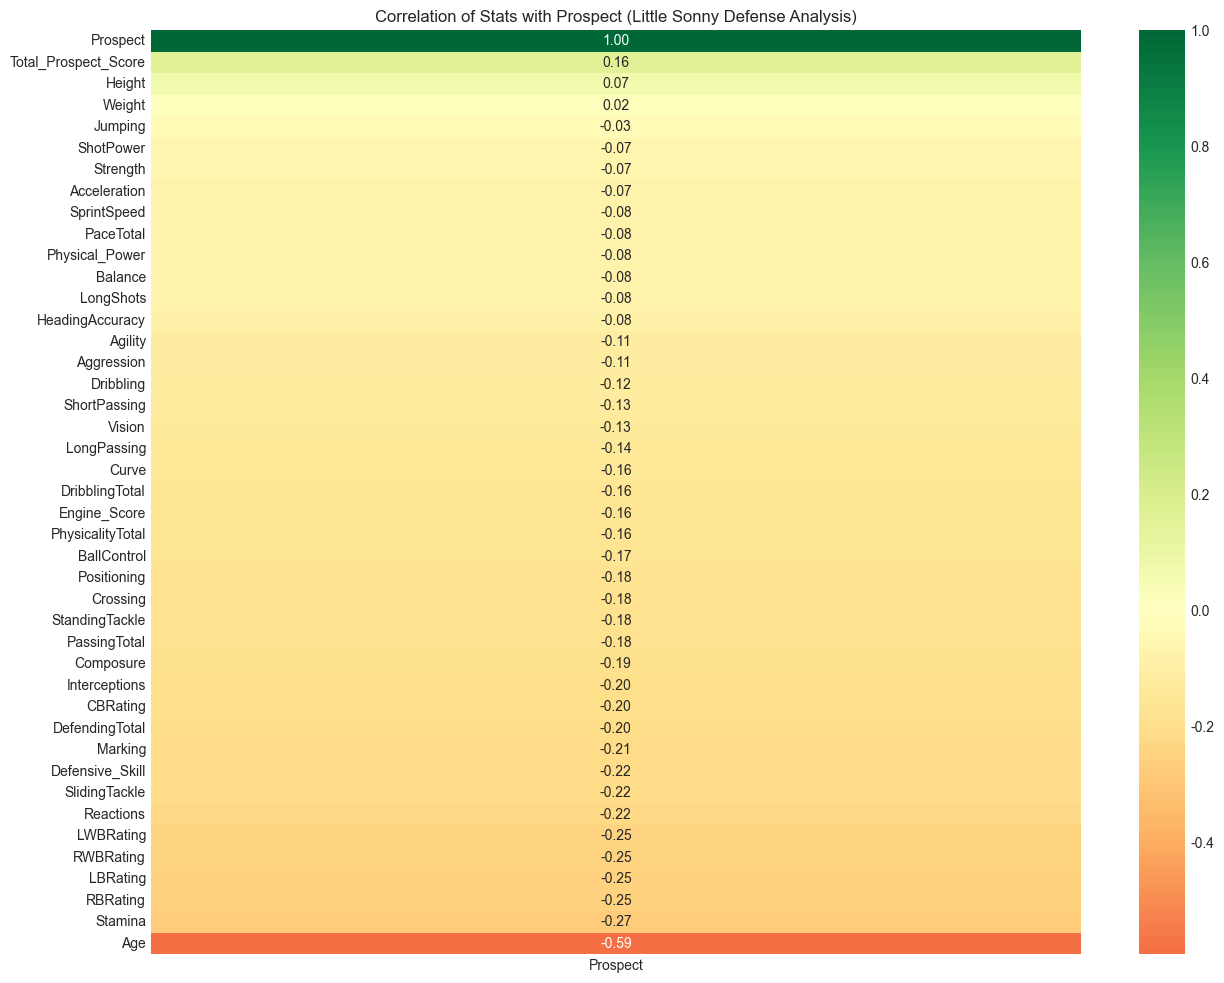

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 수치형 데이터만 선택
numeric_df = df_def_slim.select_dtypes(include=['number'])

# 2. 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 3. 히트맵 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix[['Prospect']].sort_values(by='Prospect', ascending=False), 
            annot=True, fmt=".2f", cmap='RdYlGn', center=0)

plt.title('Correlation of Stats with Prospect (Little Sonny Defense Analysis)')
plt.show()

--- 📊 little sonny 팀의 나이대별 유망주 비율 분석 ---
     Total  Prospects  Prospect_Rate (%)
Age                                     
16       4          4             100.00
17      39         35              89.74
18     109         85              77.98
19     198         99              50.00
20     248         50              20.16
21     310         15               4.84
--------------------------------------------------


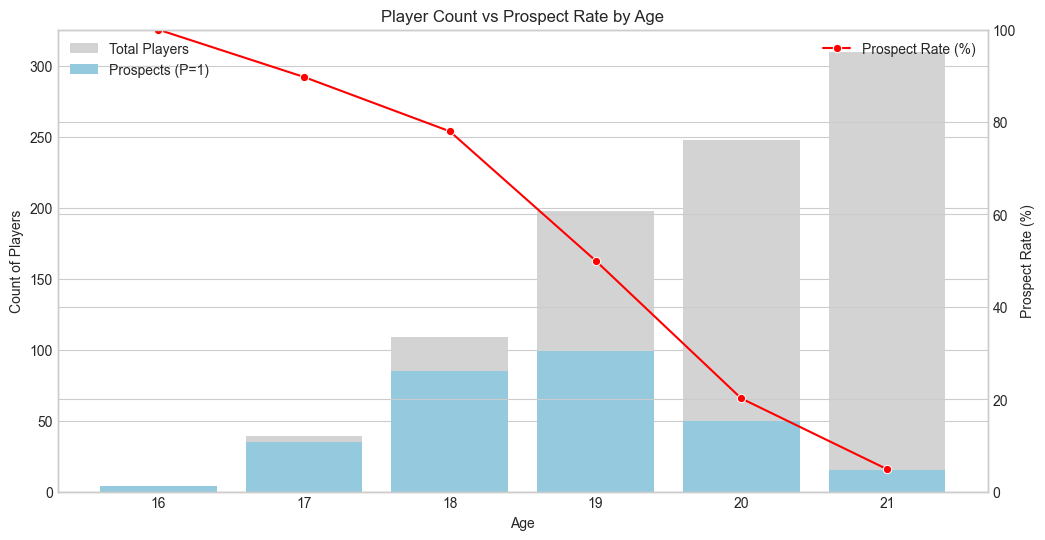

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 나이대별 전체 인원과 유망주 인원 계산
age_total = df_def_slim['Age'].value_counts().sort_index()
age_prospects = df_def_slim[df_def_slim['Prospect'] == 1]['Age'].value_counts().sort_index()

# 2. 데이터프레임으로 합치기
age_analysis = pd.DataFrame({
    'Total': age_total,
    'Prospects': age_prospects
})

# 3. 유망주 비율(%) 계산
age_analysis['Prospect_Rate (%)'] = (age_analysis['Prospects'] / age_analysis['Total'] * 100).round(2)

print("--- 📊 little sonny 팀의 나이대별 유망주 비율 분석 ---")
print(age_analysis)
print("-" * 50)

# 4. 시각화 (복합 그래프: 인원수는 막대, 비율은 선 그래프)
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대 그래프: 전체 인원 vs 유망주 인원
sns.barplot(x=age_analysis.index, y=age_analysis['Total'], color='lightgrey', label='Total Players', ax=ax1)
sns.barplot(x=age_analysis.index, y=age_analysis['Prospects'], color='skyblue', label='Prospects (P=1)', ax=ax1)
ax1.set_ylabel('Count of Players')
ax1.legend(loc='upper left')

# 선 그래프: 유망주 비율 (이중축 사용)
ax2 = ax1.twinx()
sns.lineplot(x=range(len(age_analysis)), y=age_analysis['Prospect_Rate (%)'], color='red', marker='o', label='Prospect Rate (%)', ax=ax2)
ax2.set_ylabel('Prospect Rate (%)')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right')

plt.title('Player Count vs Prospect Rate by Age')
plt.show()

In [21]:
# 1. 중앙 수비수 (Center Back)
cb_df = df_def_slim[df_def_slim['Position'] == 'CB'].copy()

# 2. 측면 수비수 (Full Back - LB, RB)
side_df = df_def_slim[df_def_slim['Position'].isin(['LB', 'RB'])].copy()

# 3. 윙백 (Wing Back - LWB, RWB)
wing_df = df_def_slim[df_def_slim['Position'].str.contains('LWB|RWB', na=False)].copy()

# 4. 제대로 쪼개졌는지 수량 체크 (검증용)
print(f"🛡️ 중앙 수비수(cb_df): {len(cb_df)}명")
print(f"🏃 측면 수비수(side_df): {len(side_df)}명")
print(f"⚡ 윙백(wing_df): {len(wing_df)}명")
print(f"✅ 총합: {len(cb_df) + len(side_df) + len(wing_df)}명 (전체 데이터와 일치 여부 확인)")

🛡️ 중앙 수비수(cb_df): 534명
🏃 측면 수비수(side_df): 257명
⚡ 윙백(wing_df): 117명
✅ 총합: 908명 (전체 데이터와 일치 여부 확인)


In [27]:
# 1. 포지션별 데이터프레임 리스트 (이미 나눠놓으신 것 활용)
dfs = [cb_df, side_df, wing_df]
titles = ["중앙 수비수 (CB)", "측면 수비수 (LB/RB)", "윙백 (LWB/RWB)"]

for df, title in zip(dfs, titles):
    # 각 데이터프레임에 동일한 통합 로직 적용
    # [종합 실력 = 수비 10% + 엔진 10% + 신체 80%]
    df['Performance_Score'] = (
        (df['Defensive_Skill'] * 0.1) + 
        (df['Engine_Score'] * 0.1) + 
        (df['Physical_Power'] * 0.8)
    )
    
    # [멘탈 = 시야/2 + 침착함/2]
    df['Mental_Score'] = (df['Vision'] + df['Composure']) / 2
    
    # [최종 모델 = (성능 0.9 + 멘탈 0.1) / 나이^3]
    df['Potential_Score_Final'] = (
        (df['Performance_Score'] * 0.9) + 
        (df['Mental_Score'] * 0.1)
    ) / (df['Age'] ** 3)

    # 결과 출력 (각 포지션별 TOP 5)
    print(f"\n--- 🎯 [little sonny {title}] 상위 유망주 ---")
    top_list = df.sort_values(by='Potential_Score_Final', ascending=False).head(10)
    print(top_list[['ID', 'Age', 'Potential_Score_Final', 'Prospect']])


--- 🎯 [little sonny 중앙 수비수 (CB)] 상위 유망주 ---
              ID  Age  Potential_Score_Final  Prospect
1569  TRAIN_1569   16               0.001538         1
428   TRAIN_0428   17               0.001381         1
1732  TRAIN_1732   17               0.001283         1
1614  TRAIN_1614   16               0.001274         1
157   TRAIN_0157   16               0.001260         1
2841  TRAIN_2841   17               0.001250         1
2331  TRAIN_2331   17               0.001247         1
2690  TRAIN_2690   17               0.001243         1
96    TRAIN_0096   17               0.001219         1
1856  TRAIN_1856   17               0.001212         1

--- 🎯 [little sonny 측면 수비수 (LB/RB)] 상위 유망주 ---
              ID  Age  Potential_Score_Final  Prospect
1610  TRAIN_1610   17               0.001188         1
2477  TRAIN_2477   16               0.001078         1
609   TRAIN_0609   17               0.001063         1
752   TRAIN_0752   18               0.001020         1
1099  TRAIN_1099   17      

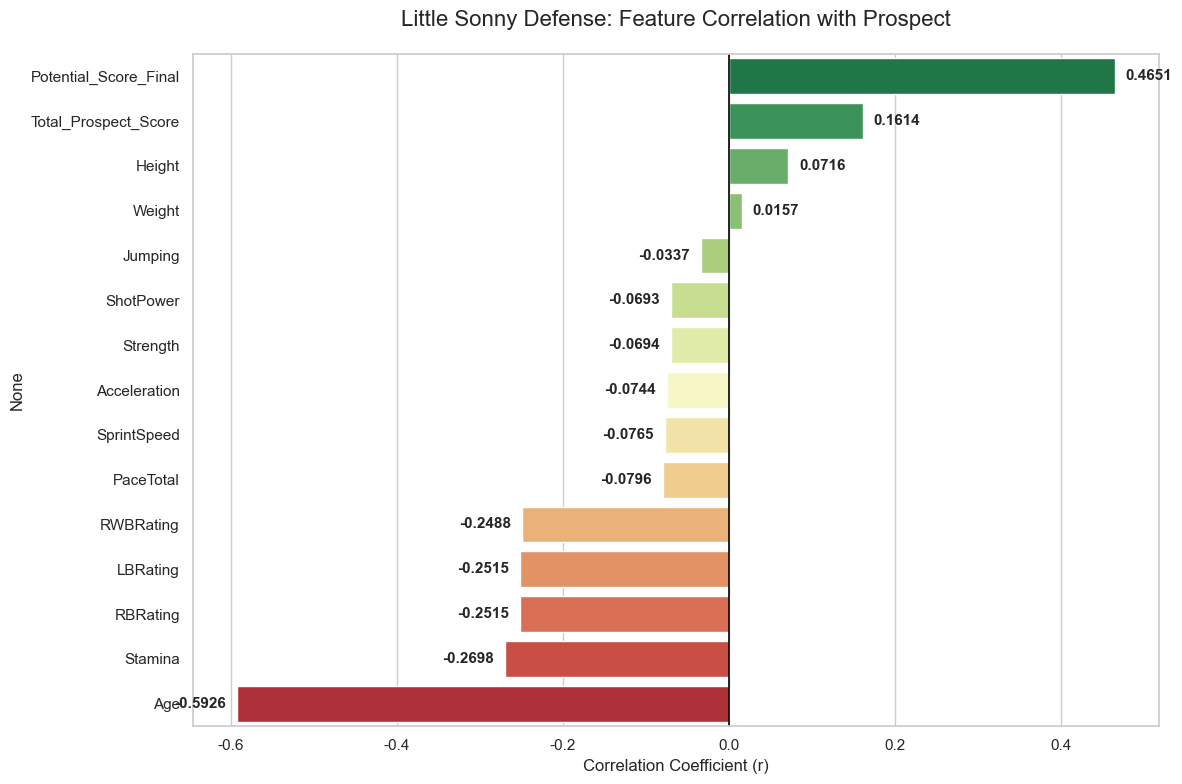

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 포지션별 데이터 통합 (우리의 커스텀 점수가 포함된 상태)
total_def_final = pd.concat([cb_df, side_df, wing_df]).reset_index(drop=True)

# 2. 상관계수 계산용 숫자형 데이터 추출
numeric_df = total_def_final.select_dtypes(include=['number'])

# 3. Prospect와의 상관계수 계산 및 정렬
prospect_corr = numeric_df.corr()['Prospect'].sort_values(ascending=False)
prospect_corr = prospect_corr.drop('Prospect') # 자기 자신 제외

# 4. 상위 10개와 하위 5개 추출 (우리 모델 점수가 어디에 위치하는지 확인)
plot_data = pd.concat([prospect_corr.head(10), prospect_corr.tail(5)])

# 5. 시각화 세팅
plt.figure(figsize=(12, 8), dpi=100)
sns.set_theme(style="whitegrid")

# 컬러 팔레트 설정 (양수는 녹색 계열, 음수는 붉은 계열)
colors = ['green' if (x > 0) else 'red' for x in plot_data.values]
ax = sns.barplot(x=plot_data.values, y=plot_data.index, palette='RdYlGn_r')

# 6. 디자인 디테일 및 수치 표시
plt.title('Little Sonny Defense: Feature Correlation with Prospect', fontsize=16, pad=20)
plt.xlabel('Correlation Coefficient (r)', fontsize=12)
plt.axvline(0, color='black', linewidth=1.2) # 중심선

# 막대 끝에 상관계수 수치 직접 표시
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.4f}', 
                (width, p.get_y() + p.get_height()/2.), 
                ha='left' if width > 0 else 'right', 
                va='center', 
                xytext=(8 if width > 0 else -8, 0), 
                textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [26]:
# 1. 컬럼명 변경 (DEF 접두어 추가)
# 이미 나눠진 데이터프레임들을 합친 total_def_final(또는 df_def_slim)에서 수행
defense_feature_set = total_def_final[['ID', 'Potential_Score_Final']].copy()
defense_feature_set.rename(columns={'Potential_Score_Final': 'DEF_Potential_Score_Final'}, inplace=True)

# 2. 결과 확인
print("--- 🏁 Little Sonny 수비수 파트 제출 피처 ---")
print(defense_feature_set.head())

# 3. CSV 파일로 내보내기 (팀원 공유용)
defense_feature_set.to_csv('DEF_prospect_feature.csv', index=False)

--- 🏁 Little Sonny 수비수 파트 제출 피처 ---
           ID  DEF_Potential_Score_Final
0  TRAIN_0000                   0.000690
1  TRAIN_0003                   0.000601
2  TRAIN_0009                   0.000986
3  TRAIN_0012                   0.000899
4  TRAIN_0017                   0.001114
